# Project - Student Performance and Attendance Analysis

## Data Preparation

### 1.	Load the student marks and attendance data from the provided Excel files into two separate Pandas DataFrames.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
marks_df = pd.read_excel("Student_Performance_Analysis.xlsx",sheet_name="Marks")
marks_df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment
0,Arjun,9,5,14,16.0
1,Sophia Hardy,8,9,113,19.0
2,RAj,10,10,15,20.0
3,Emily,9,7,11,16.0
4,Ishaan Saini,8,7,14,11.0
...,...,...,...,...,...
105,Makayla,2,7,13,3.0
106,Ishaan Kapoor,9,6,13,20.0
107,Addison,8,8,12,12.0
108,Aditya Srivastava,5,5,8,17.0


In [115]:
attendance_df = pd.read_excel("Student_Performance_Analysis.xlsx", sheet_name="Attendance")
attendance_df

,Name,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,Y,N,N,N,Y
1,Sophia Hardy,Y,N,N,Y,Y
2,RAj,Y,Y,Y,Y,Y
3,Emily,Y,Y,N,Y,Y
4,Ishaan Saini,N,N,N,N,Y
...,...,...,...,...,...,...
105,Makayla,Y,Y,Y,Y,Y
106,Ishaan Kapoor,Y,N,N,Y,Y
107,Addison,Y,Y,Y,Y,Y
108,Aditya Srivastava,N,N,N,Y,Y


### 2.	Merge the two DataFrames on the Name column to create a single DataFrame.

In [116]:
df = pd.merge(marks_df,attendance_df,on ="Name",how = "inner")
df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9,5,14,16.0,Y,N,N,N,Y
1,Sophia Hardy,8,9,113,19.0,Y,N,N,Y,Y
2,RAj,10,10,15,20.0,Y,Y,Y,Y,Y
3,Emily,9,7,11,16.0,Y,Y,N,Y,Y
4,Ishaan Saini,8,7,14,11.0,N,N,N,N,Y
...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2,7,13,3.0,Y,Y,Y,Y,Y
106,Ishaan Kapoor,9,6,13,20.0,Y,N,N,Y,Y
107,Addison,8,8,12,12.0,Y,Y,Y,Y,Y
108,Aditya Srivastava,5,5,8,17.0,N,N,N,Y,Y


### 3.	Replace attendance values ('Y' or 'N') with numeric values (1 for 'Y' and 0 for 'N').

In [117]:
attendance = df.columns[df.columns.str.contains("Day")]
df[attendance] = (df[attendance].replace({'Y': 1, 'N': 0}))
df

C:\Users\kakat\AppData\Local\Temp\ipykernel_22644\1692827678.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attendance] = (df[attendance].replace({'Y': 1, 'N': 0}))


,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9,5,14,16.0,1,0,0,0,1
1,Sophia Hardy,8,9,113,19.0,1,0,0,1,1
2,RAj,10,10,15,20.0,1,1,1,1,1
3,Emily,9,7,11,16.0,1,1,0,1,1
4,Ishaan Saini,8,7,14,11.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2,7,13,3.0,1,1,1,1,1
106,Ishaan Kapoor,9,6,13,20.0,1,0,0,1,1
107,Addison,8,8,12,12.0,1,1,1,1,1
108,Aditya Srivastava,5,5,8,17.0,0,0,0,1,1


### 4.	Deal with the missing values.

In [118]:
df.isnull().sum()

Name                0
Mini Test 1         1
Mini Test 2         1
Live Test           1
Assignment          1
Attendance Day 1    0
Attendance Day 2    0
Attendance Day 3    0
Attendance Day 4    0
Attendance Day 5    0
dtype: int64

In [119]:
Marks = ["Mini Test 1", "Mini Test 2", "Live Test", "Assignment"]
df[Marks] = df[Marks].fillna(0)
df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9,5,14,16.0,1,0,0,0,1
1,Sophia Hardy,8,9,113,19.0,1,0,0,1,1
2,RAj,10,10,15,20.0,1,1,1,1,1
3,Emily,9,7,11,16.0,1,1,0,1,1
4,Ishaan Saini,8,7,14,11.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2,7,13,3.0,1,1,1,1,1
106,Ishaan Kapoor,9,6,13,20.0,1,0,0,1,1
107,Addison,8,8,12,12.0,1,1,1,1,1
108,Aditya Srivastava,5,5,8,17.0,0,0,0,1,1


Data observation: Some test and assignment marks were missing.They were replaced with 0, assuming the student did not attempt the test.After this step, no missing values remain.

In [120]:
df.isnull().sum()

Name                0
Mini Test 1         0
Mini Test 2         0
Live Test           0
Assignment          0
Attendance Day 1    0
Attendance Day 2    0
Attendance Day 3    0
Attendance Day 4    0
Attendance Day 5    0
dtype: int64

### 5.	Do the column cleaning like name column is the combination of upper and lower case.

In [121]:
df["Name"] = df["Name"].str.strip().str.title()
df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5
0,Arjun,9,5,14,16.0,1,0,0,0,1
1,Sophia Hardy,8,9,113,19.0,1,0,0,1,1
2,Raj,10,10,15,20.0,1,1,1,1,1
3,Emily,9,7,11,16.0,1,1,0,1,1
4,Ishaan Saini,8,7,14,11.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2,7,13,3.0,1,1,1,1,1
106,Ishaan Kapoor,9,6,13,20.0,1,0,0,1,1
107,Addison,8,8,12,12.0,1,1,1,1,1
108,Aditya Srivastava,5,5,8,17.0,0,0,0,1,1


## Data Transformation

## 1.	Create separate columns for below:

### Total marks for each student.

In [122]:
marks = ["Mini Test 1", "Mini Test 2", "Live Test", "Assignment"]
df[marks] = df[marks].apply(pd.to_numeric, errors="coerce")
df["Total Marks"] = df[marks].sum(axis=1)
df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1,43.0
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1,40.0
...,...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2.0,7.0,13.0,3.0,1,1,1,1,1,25.0
106,Ishaan Kapoor,9.0,6.0,13.0,20.0,1,0,0,1,1,48.0
107,Addison,8.0,8.0,12.0,12.0,1,1,1,1,1,40.0
108,Aditya Srivastava,5.0,5.0,8.0,17.0,0,0,0,1,1,35.0


Data Observation: Total marks were calculated by adding all test and assignment scores. While checking the data, one unusually high value was noticed in the Live Test column, which may be a data entry issue. Apart from this, the data looks consistent and suitable for further analysis.

### Percentage marks for each student.

Data Observation: While reviewing the data, it was observed that the maximum marks for each assessment were not specified. To avoid making assumptions, the analysis treats the given scores as obtained marks and compares student performance relatively.

In [123]:
max_total_marks = 55
df["Marks Percentage"] = (df["Total Marks"] / max_total_marks) * 100
df["Marks Percentage"] = df["Marks Percentage"].round(2)
df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Marks Percentage
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,80.00
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,270.91
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,100.00
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1,43.0,78.18
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1,40.0,72.73
...,...,...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2.0,7.0,13.0,3.0,1,1,1,1,1,25.0,45.45
106,Ishaan Kapoor,9.0,6.0,13.0,20.0,1,0,0,1,1,48.0,87.27
107,Addison,8.0,8.0,12.0,12.0,1,1,1,1,1,40.0,72.73
108,Aditya Srivastava,5.0,5.0,8.0,17.0,0,0,0,1,1,35.0,63.64


Data Observation:
Percentage marks were calculated using a total maximum of 55 marks, inferred from the test structure.
One unusually high score in the Live Test caused percentage values above 100 for a few students.
Apart from this, the calculation logic is correct.

### Attendance percentage for each student based on attendance columns.

In [124]:
df["Attendance Percentage"] = (df[attendance].sum(axis = 1)/len(attendance))*100
df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Marks Percentage,Attendance Percentage
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,80.00,40.0
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,270.91,60.0
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,100.00,100.0
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1,43.0,78.18,80.0
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1,40.0,72.73,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2.0,7.0,13.0,3.0,1,1,1,1,1,25.0,45.45,100.0
106,Ishaan Kapoor,9.0,6.0,13.0,20.0,1,0,0,1,1,48.0,87.27,60.0
107,Addison,8.0,8.0,12.0,12.0,1,1,1,1,1,40.0,72.73,100.0
108,Aditya Srivastava,5.0,5.0,8.0,17.0,0,0,0,1,1,35.0,63.64,40.0


Data observation:
Attendance percentage was calculated based on the number of days present out of total attendance days.
The values correctly reflect each student’s attendance.

### Calculate the weighted percentage – Attendance(40%), Mini test01(10%), Mini test02(10%), Live test(20%), Assignment (20%).

In [125]:
df["Weighted Percentage"] = (
    df["Attendance Percentage"] * 0.40 +
    (df["Mini Test 1"] / 10) * 100 * 0.10 +
    (df["Mini Test 2"] / 10) * 100 * 0.10 +
    (df["Live Test"] / 15) * 100 * 0.20 +
    (df["Assignment"] / 20) * 100 * 0.20
)

df["Weighted Percentage"] = df["Weighted Percentage"].round(2)
df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Marks Percentage,Attendance Percentage,Weighted Percentage
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,80.00,40.0,64.67
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,270.91,60.0,210.67
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,100.00,100.0,100.00
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1,43.0,78.18,80.0,78.67
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1,40.0,72.73,20.0,52.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2.0,7.0,13.0,3.0,1,1,1,1,1,25.0,45.45,100.0,69.33
106,Ishaan Kapoor,9.0,6.0,13.0,20.0,1,0,0,1,1,48.0,87.27,60.0,76.33
107,Addison,8.0,8.0,12.0,12.0,1,1,1,1,1,40.0,72.73,100.0,84.00
108,Aditya Srivastava,5.0,5.0,8.0,17.0,0,0,0,1,1,35.0,63.64,40.0,53.67


Data observation:
Weighted percentage was calculated by combining attendance and test scores using the given weights.
Some values are higher because of unusually high marks in the data, but the calculation method is correct.

### Use this weighted percentage for further calculations.

In [126]:
def performance(score):
    if score >= 85:
        return "Excellent"
    elif score >= 71:
        return "Good"
    elif score >= 50:
        return "Average"
    else:
        return "Needs Improvement"

df["Performance"] = df["Weighted Percentage"].apply(performance)
df

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Marks Percentage,Attendance Percentage,Weighted Percentage,Performance
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,80.00,40.0,64.67,Average
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,270.91,60.0,210.67,Excellent
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,100.00,100.0,100.00,Excellent
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1,43.0,78.18,80.0,78.67,Good
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1,40.0,72.73,20.0,52.67,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2.0,7.0,13.0,3.0,1,1,1,1,1,25.0,45.45,100.0,69.33,Average
106,Ishaan Kapoor,9.0,6.0,13.0,20.0,1,0,0,1,1,48.0,87.27,60.0,76.33,Good
107,Addison,8.0,8.0,12.0,12.0,1,1,1,1,1,40.0,72.73,100.0,84.00,Good
108,Aditya Srivastava,5.0,5.0,8.0,17.0,0,0,0,1,1,35.0,63.64,40.0,53.67,Average


Data Observation: Students were classified into performance categories using the weighted percentage.
The classification follows the given rules and works correctly.

### 2.	Classify each student's performance into categories:
o	"Excellent" for percentages ≥ 85.
o	"Good" for percentages between 71 and 84.
o	"Average" for percentages between 50 and 70.
o	"Needs Improvement" for percentages < 50.


In [127]:
def performance(score):
    if score >= 85:
        return "Excellent"
    elif score >= 71:
        return "Good"
    elif score >= 50:
        return "Average"
    else:
        return "Needs Improvement"

df["Performance"] = df["Weighted Percentage"].apply(performance)
df


,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Marks Percentage,Attendance Percentage,Weighted Percentage,Performance
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,80.00,40.0,64.67,Average
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,270.91,60.0,210.67,Excellent
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,100.00,100.0,100.00,Excellent
3,Emily,9.0,7.0,11.0,16.0,1,1,0,1,1,43.0,78.18,80.0,78.67,Good
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1,40.0,72.73,20.0,52.67,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Makayla,2.0,7.0,13.0,3.0,1,1,1,1,1,25.0,45.45,100.0,69.33,Average
106,Ishaan Kapoor,9.0,6.0,13.0,20.0,1,0,0,1,1,48.0,87.27,60.0,76.33,Good
107,Addison,8.0,8.0,12.0,12.0,1,1,1,1,1,40.0,72.73,100.0,84.00,Good
108,Aditya Srivastava,5.0,5.0,8.0,17.0,0,0,0,1,1,35.0,63.64,40.0,53.67,Average


## Analysis

### 1.	Identify students with attendance below 75% but weighted percentage >50%.

In [128]:
students_performance = df[(df['Attendance Percentage'] < 75) & (df['Weighted Percentage'] > 50)]
students_performance

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Marks Percentage,Attendance Percentage,Weighted Percentage,Performance
0,Arjun,9.0,5.0,14.0,16.0,1,0,0,0,1,44.0,80.00,40.0,64.67,Average
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,270.91,60.0,210.67,Excellent
4,Ishaan Saini,8.0,7.0,14.0,11.0,0,0,0,0,1,40.0,72.73,20.0,52.67,Average
5,Olivia,9.0,7.0,8.0,15.0,0,1,0,1,1,39.0,70.91,60.0,65.67,Average
6,Maya,10.0,10.0,15.0,20.0,0,0,0,1,1,55.0,100.00,40.0,76.00,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Ananya Oberoi,6.0,10.0,10.0,15.0,0,1,0,1,1,41.0,74.55,60.0,68.33,Average
103,Grayson,10.0,9.0,14.0,15.0,0,0,0,1,1,48.0,87.27,40.0,68.67,Average
104,Ayush,6.0,8.0,12.0,12.0,1,1,1,0,0,38.0,69.09,60.0,66.00,Average
106,Ishaan Kapoor,9.0,6.0,13.0,20.0,1,0,0,1,1,48.0,87.27,60.0,76.33,Good


Data Observation: Some students have low attendance but still perform well academically.
These students are clearly identified using attendance and weighted percentage.

### 2.	Highlight the top three students based on percentage marks.

In [129]:
top_three_students = df.sort_values(by = "Marks Percentage",ascending = False).head(3)
top_three_students

,Name,Mini Test 1,Mini Test 2,Live Test,Assignment,Attendance Day 1,Attendance Day 2,Attendance Day 3,Attendance Day 4,Attendance Day 5,Total Marks,Marks Percentage,Attendance Percentage,Weighted Percentage,Performance
1,Sophia Hardy,8.0,9.0,113.0,19.0,1,0,0,1,1,149.0,270.91,60.0,210.67,Excellent
2,Raj,10.0,10.0,15.0,20.0,1,1,1,1,1,55.0,100.00,100.0,100.00,Excellent
6,Maya,10.0,10.0,15.0,20.0,0,0,0,1,1,55.0,100.00,40.0,76.00,Good


Short data observation:
The top three students were identified by sorting percentage marks in descending order.
Sophia Hardy (270.91%) student appears with a very high percentage due to a high test score in the data, but the ranking logic is correct.

### 3.	Impact of attendance on Tests/Assignment marks. 

In [130]:
impact_df = df[['Attendance Percentage','Mini Test 1','Mini Test 2','Live Test','Assignment']]
impact_df.corr()

,Attendance Percentage,Mini Test 1,Mini Test 2,Live Test,Assignment
Attendance Percentage,1.000000,-0.047470,-0.024013,0.049305,-0.049725
Mini Test 1,-0.047470,1.000000,0.031677,0.147246,0.261802
Mini Test 2,-0.024013,0.031677,1.000000,0.161809,0.163118
Live Test,0.049305,0.147246,0.161809,1.000000,0.164926
Assignment,-0.049725,0.261802,0.163118,0.164926,1.000000


Data Observation:
The analysis shows that attendance does not have a strong impact on test or assignment marks.
Some students with low attendance still perform well in exams, while some regular students score average marks.
This suggests that student performance is influenced by factors other than attendance alone.

## Visualization

### 1.	Create a bar chart displaying weighted percentages for top 5 students.

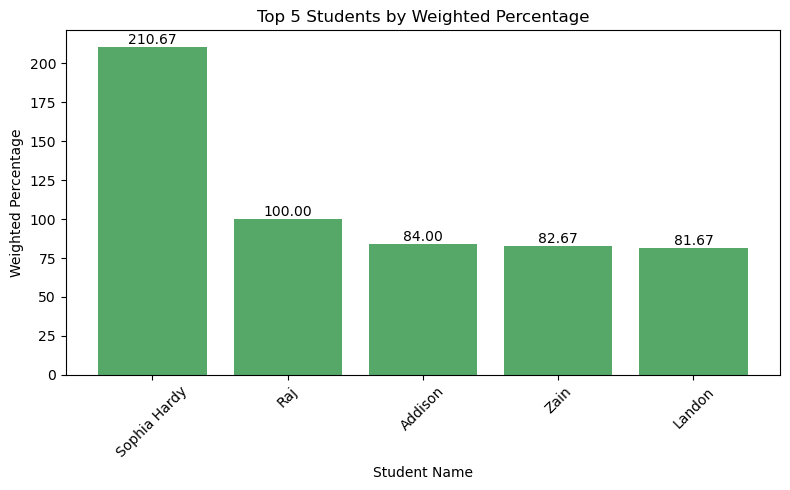

In [131]:
plt.figure(figsize=(8,5))

top_5 = df.sort_values(by="Weighted Percentage", ascending=False).head(5)

bars = plt.bar(top_5["Name"], top_5["Weighted Percentage"], color="#55A868")

plt.xlabel("Student Name")
plt.ylabel("Weighted Percentage")
plt.title("Top 5 Students by Weighted Percentage")
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


Visualization Insight: The bar chart clearly shows the top five students based on weighted percentage.
It helps us easily see who performed the best and how close the other students are.

### 2.	Create a pie chart showing the distribution of students across the four performance categories.

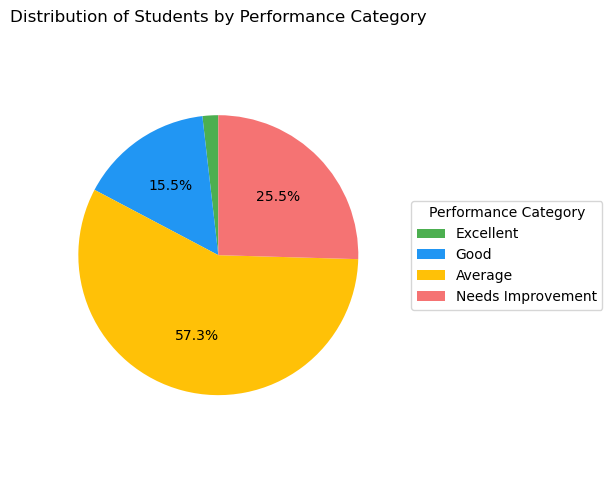

In [139]:
plt.figure(figsize=(6, 5))
category_order = ["Excellent", "Good", "Average", "Needs Improvement"]
category_counts = (
    df["Performance"]
    .value_counts()
    .reindex(category_order, fill_value=0)
)
colors = ["#4CAF50", "#2196F3", "#FFC107", "#F57373"]

def show_pct(pct):
    return f"{pct:.1f}%" if pct >= 5 else ""
    
plt.pie(
    category_counts,
    colors=colors,
    autopct=show_pct,
    startangle=90
)

plt.legend(
    category_counts.index,
    title="Performance Category",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Distribution of Students by Performance Category")
plt.axis("equal")
plt.tight_layout()
plt.show()


Visualization Insight:
The pie chart shows how students are spread across different performance levels.
Most students fall into one or two main categories, while fewer students are in the extreme groups.

### 3.	Create box plots for each test (Live Test, Mini Test 1, Mini Test 2, Assignment) to visualize the spread and detect potential outliers in scores.

C:\Users\kakat\AppData\Local\Temp\ipykernel_22644\1102578306.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


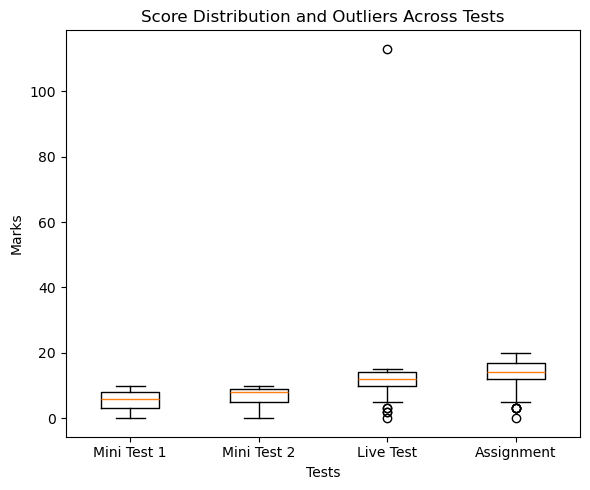

In [140]:
plt.figure(figsize=(6, 5))
test_cols = ["Mini Test 1", "Mini Test 2", "Live Test", "Assignment"]
df[test_cols] = df[test_cols].apply(pd.to_numeric, errors="coerce")

plt.boxplot(
    [df[col].dropna() for col in test_cols],
    labels=test_cols,
    showfliers=True
)

plt.xlabel("Tests")
plt.ylabel("Marks")
plt.title("Score Distribution and Outliers Across Tests")
plt.tight_layout()
plt.show()


Visualization Insight:
The box plots show how scores are spread across different tests.
Most tests have similar score ranges, but the Live Test shows an outlier, indicating an unusually high score.

### 4.	Create a chart to show the students where attendance is less than 50%.

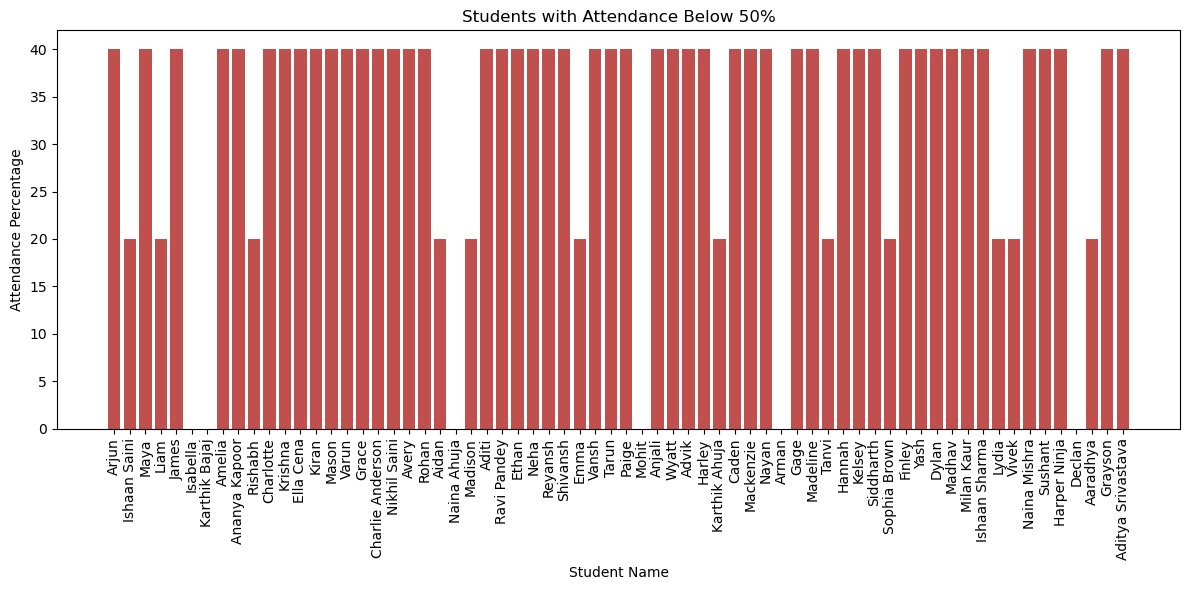

In [142]:
less_attendance = df[df["Attendance Percentage"] < 50]

plt.figure(figsize=(12,6)) 
plt.bar(less_attendance["Name"], 
        less_attendance["Attendance Percentage"], 
        color="#C0504D") 

plt.xlabel("Student Name") 
plt.ylabel("Attendance Percentage")
plt.title("Students with Attendance Below 50%") 

plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

Visualization Insight:This chart highlights students whose attendance is below 50%.
Each bar represents a student, and the bar length shows their attendance level.
Students with shorter bars have very low attendance

### 5.	Any other visualization/analysis which you can infer from data for the management.

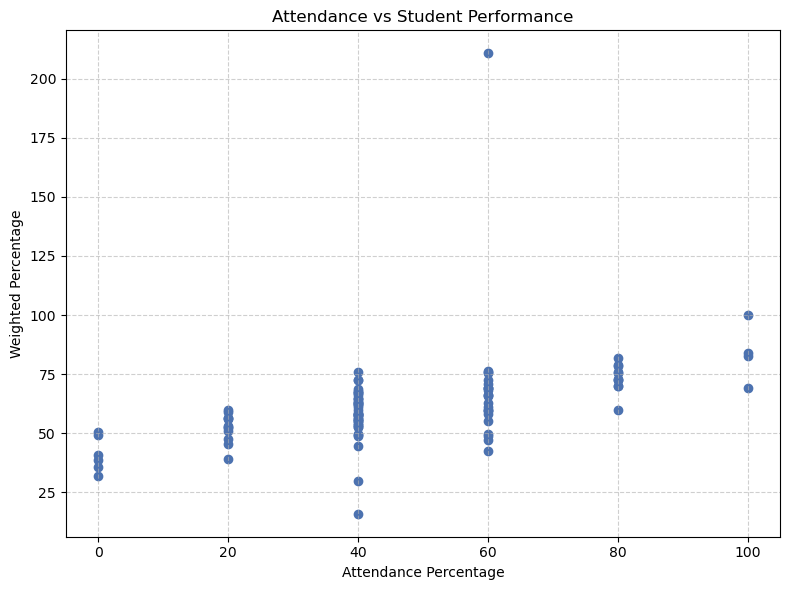

In [144]:
plt.figure(figsize=(8,6))

plt.scatter(
    df["Attendance Percentage"],
    df["Weighted Percentage"],
    color="#4C72B0"
)
plt.xlabel("Attendance Percentage")
plt.ylabel("Weighted Percentage")
plt.title("Attendance vs Student Performance")

plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


Visualization Insight: This chart shows the relationship between attendance and performance.
Some students perform well even with low attendance, while others need support.

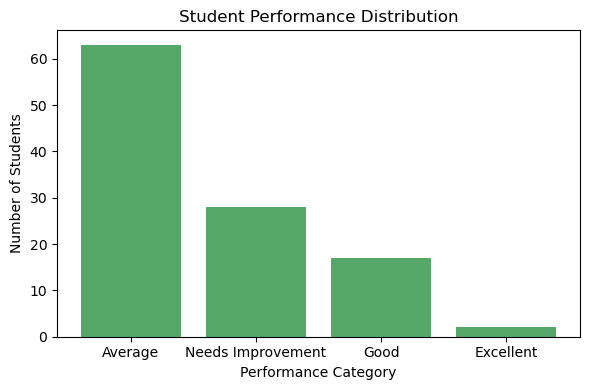

In [145]:
plt.figure(figsize=(6,4))
performance_count = df["Performance"].value_counts()

plt.bar(
    performance_count.index,
    performance_count.values,
    color="#55A868"
)

plt.xlabel("Performance Category")
plt.ylabel("Number of Students")
plt.title("Student Performance Distribution")

plt.tight_layout()
plt.show()

Visualization Insight: Most students fall under Average and Good categories, while a smaller group needs improvement.